## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

# Setting the stying of the Seaborn figure
sns.set_style('darkgrid')

## Load and explore data

In [3]:
# Import the dataset
country_data = pd.read_csv('Country-data.csv')
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the shape
country_data.shape

(167, 10)

In [5]:
# Check datatypes & counts
country_data.info()
country_data.value_counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


<bound method DataFrame.value_counts of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56

In [6]:
# Get descriptive statistics
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
country_data.drop(columns=['country'], inplace=True)


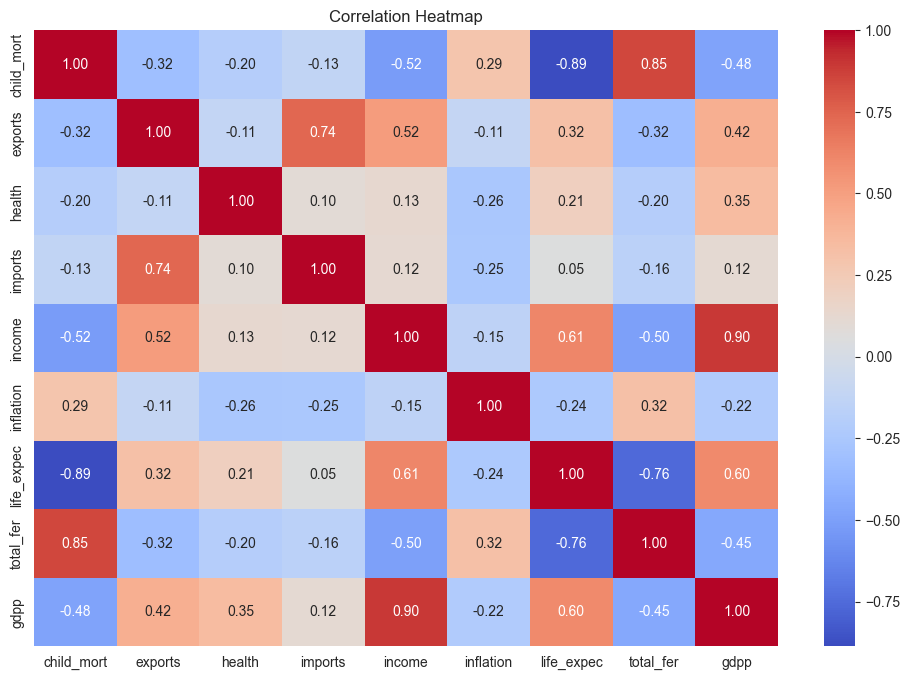

In [9]:
# Create a correlation map of features to explore relationships between features
# Hint: Explore seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- According to this heatmap, the feature with the best relationship to gdpp would be income at a correlation of 0.90.
- Next best would be life expectancy. Both could be used to show a good positive correlation with gdpp.

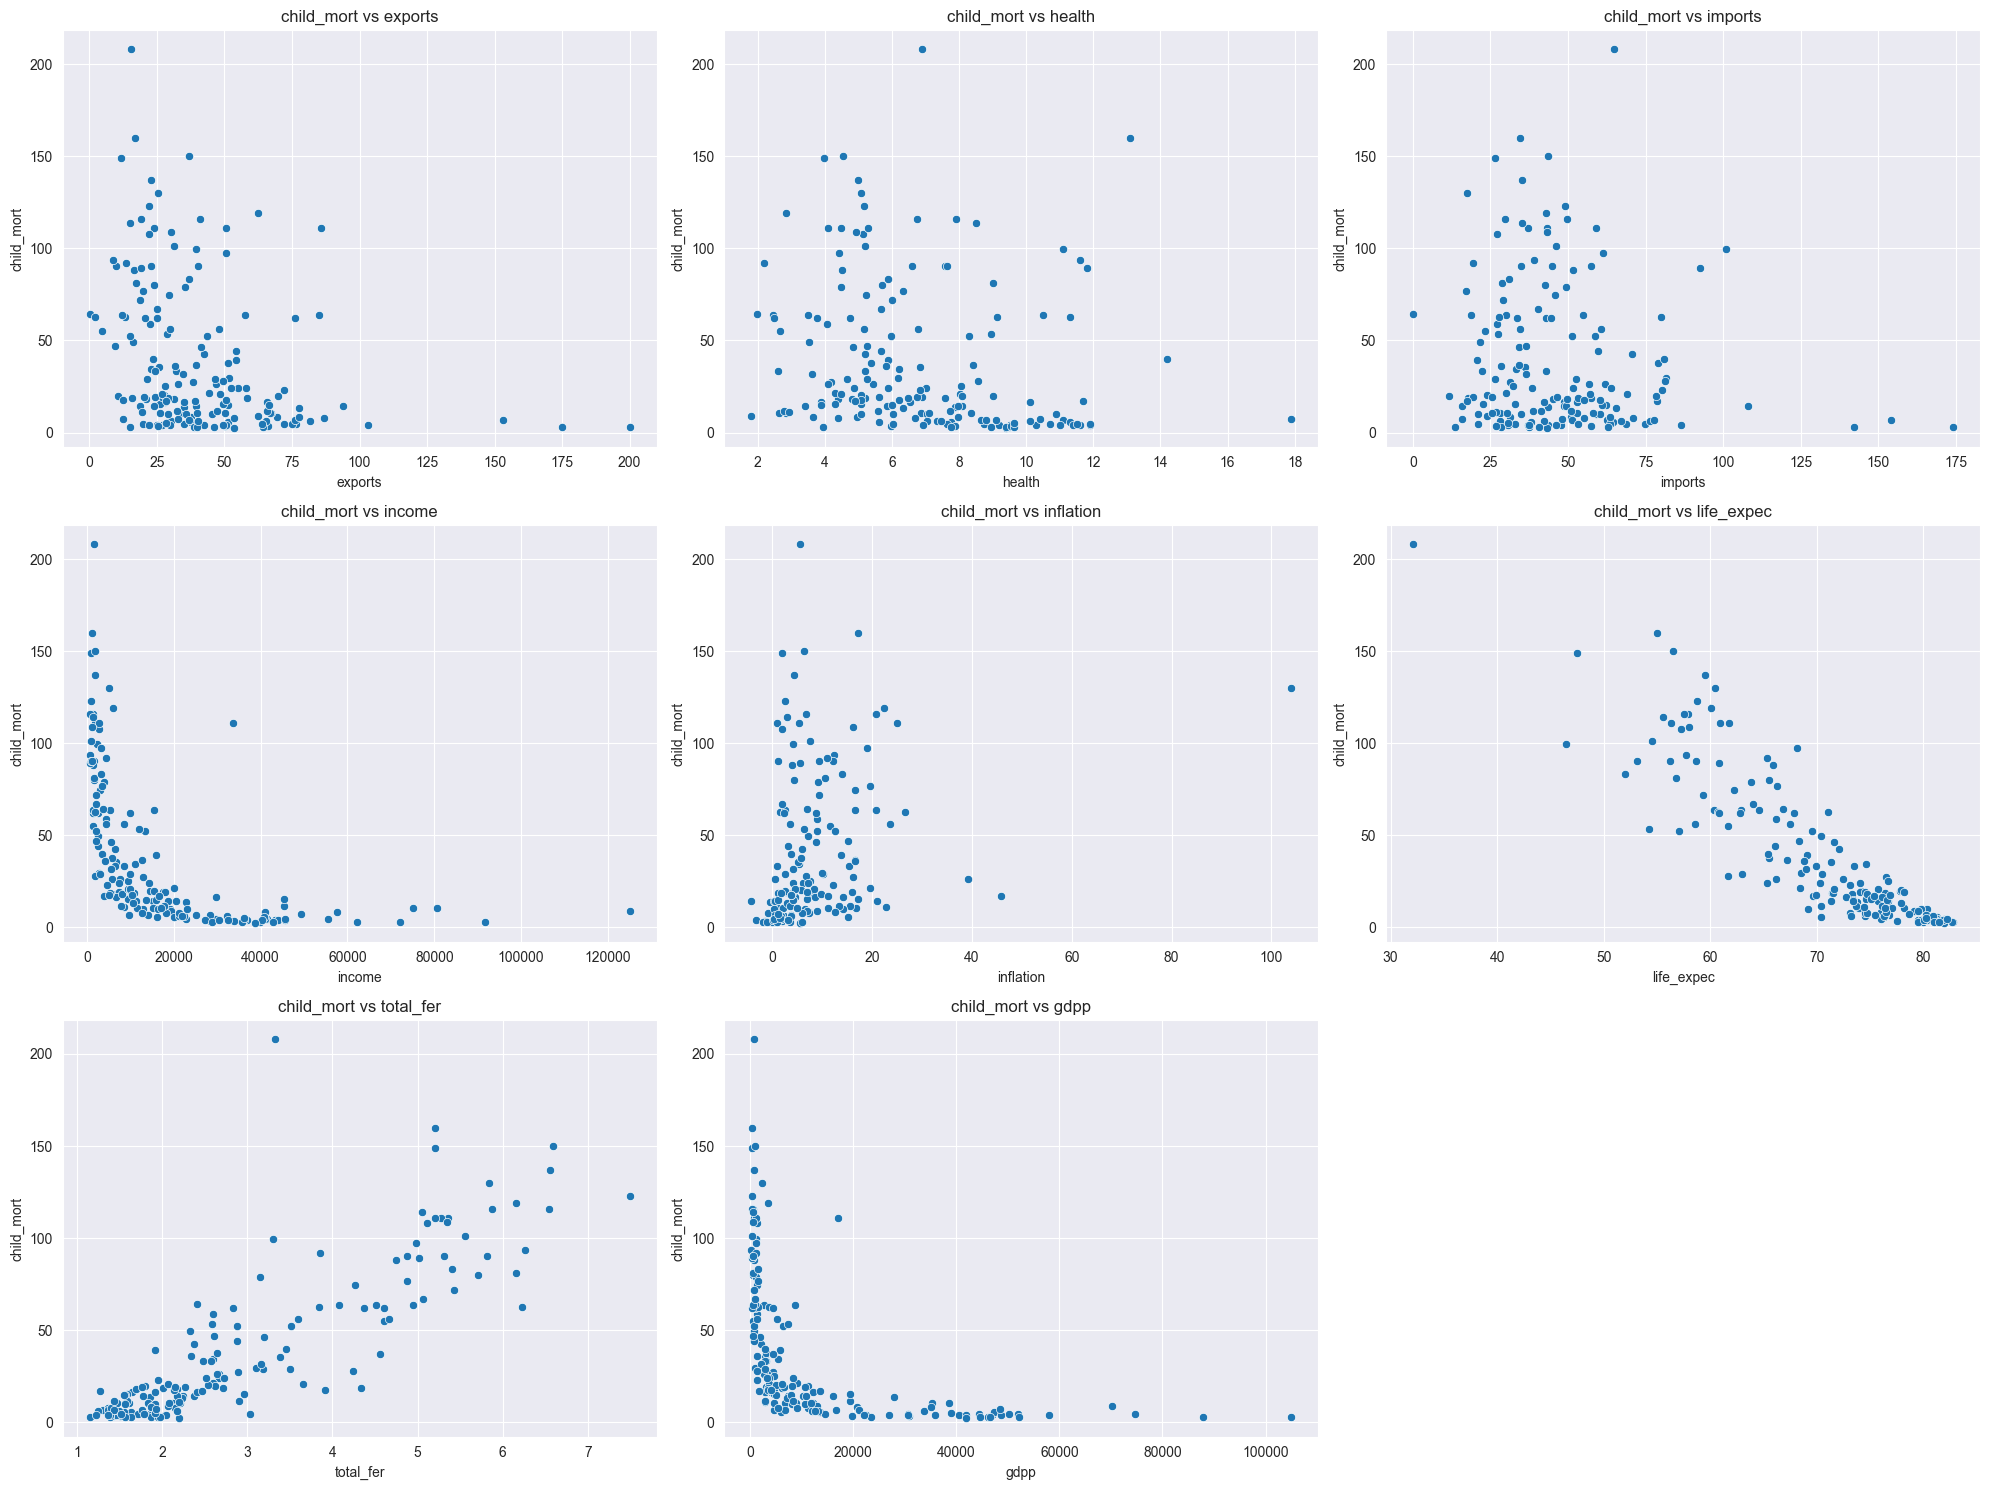

In [10]:
# Explore the continuous independent features against child_mort using scatter plots.
# List of continuous independent features
features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

# Create scatter plots
plt.figure(figsize=(20, 15))

# Loop through each feature to create the scatter plots
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=country_data[feature], y=country_data['child_mort'])
    plt.title(f'child_mort vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('child_mort')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

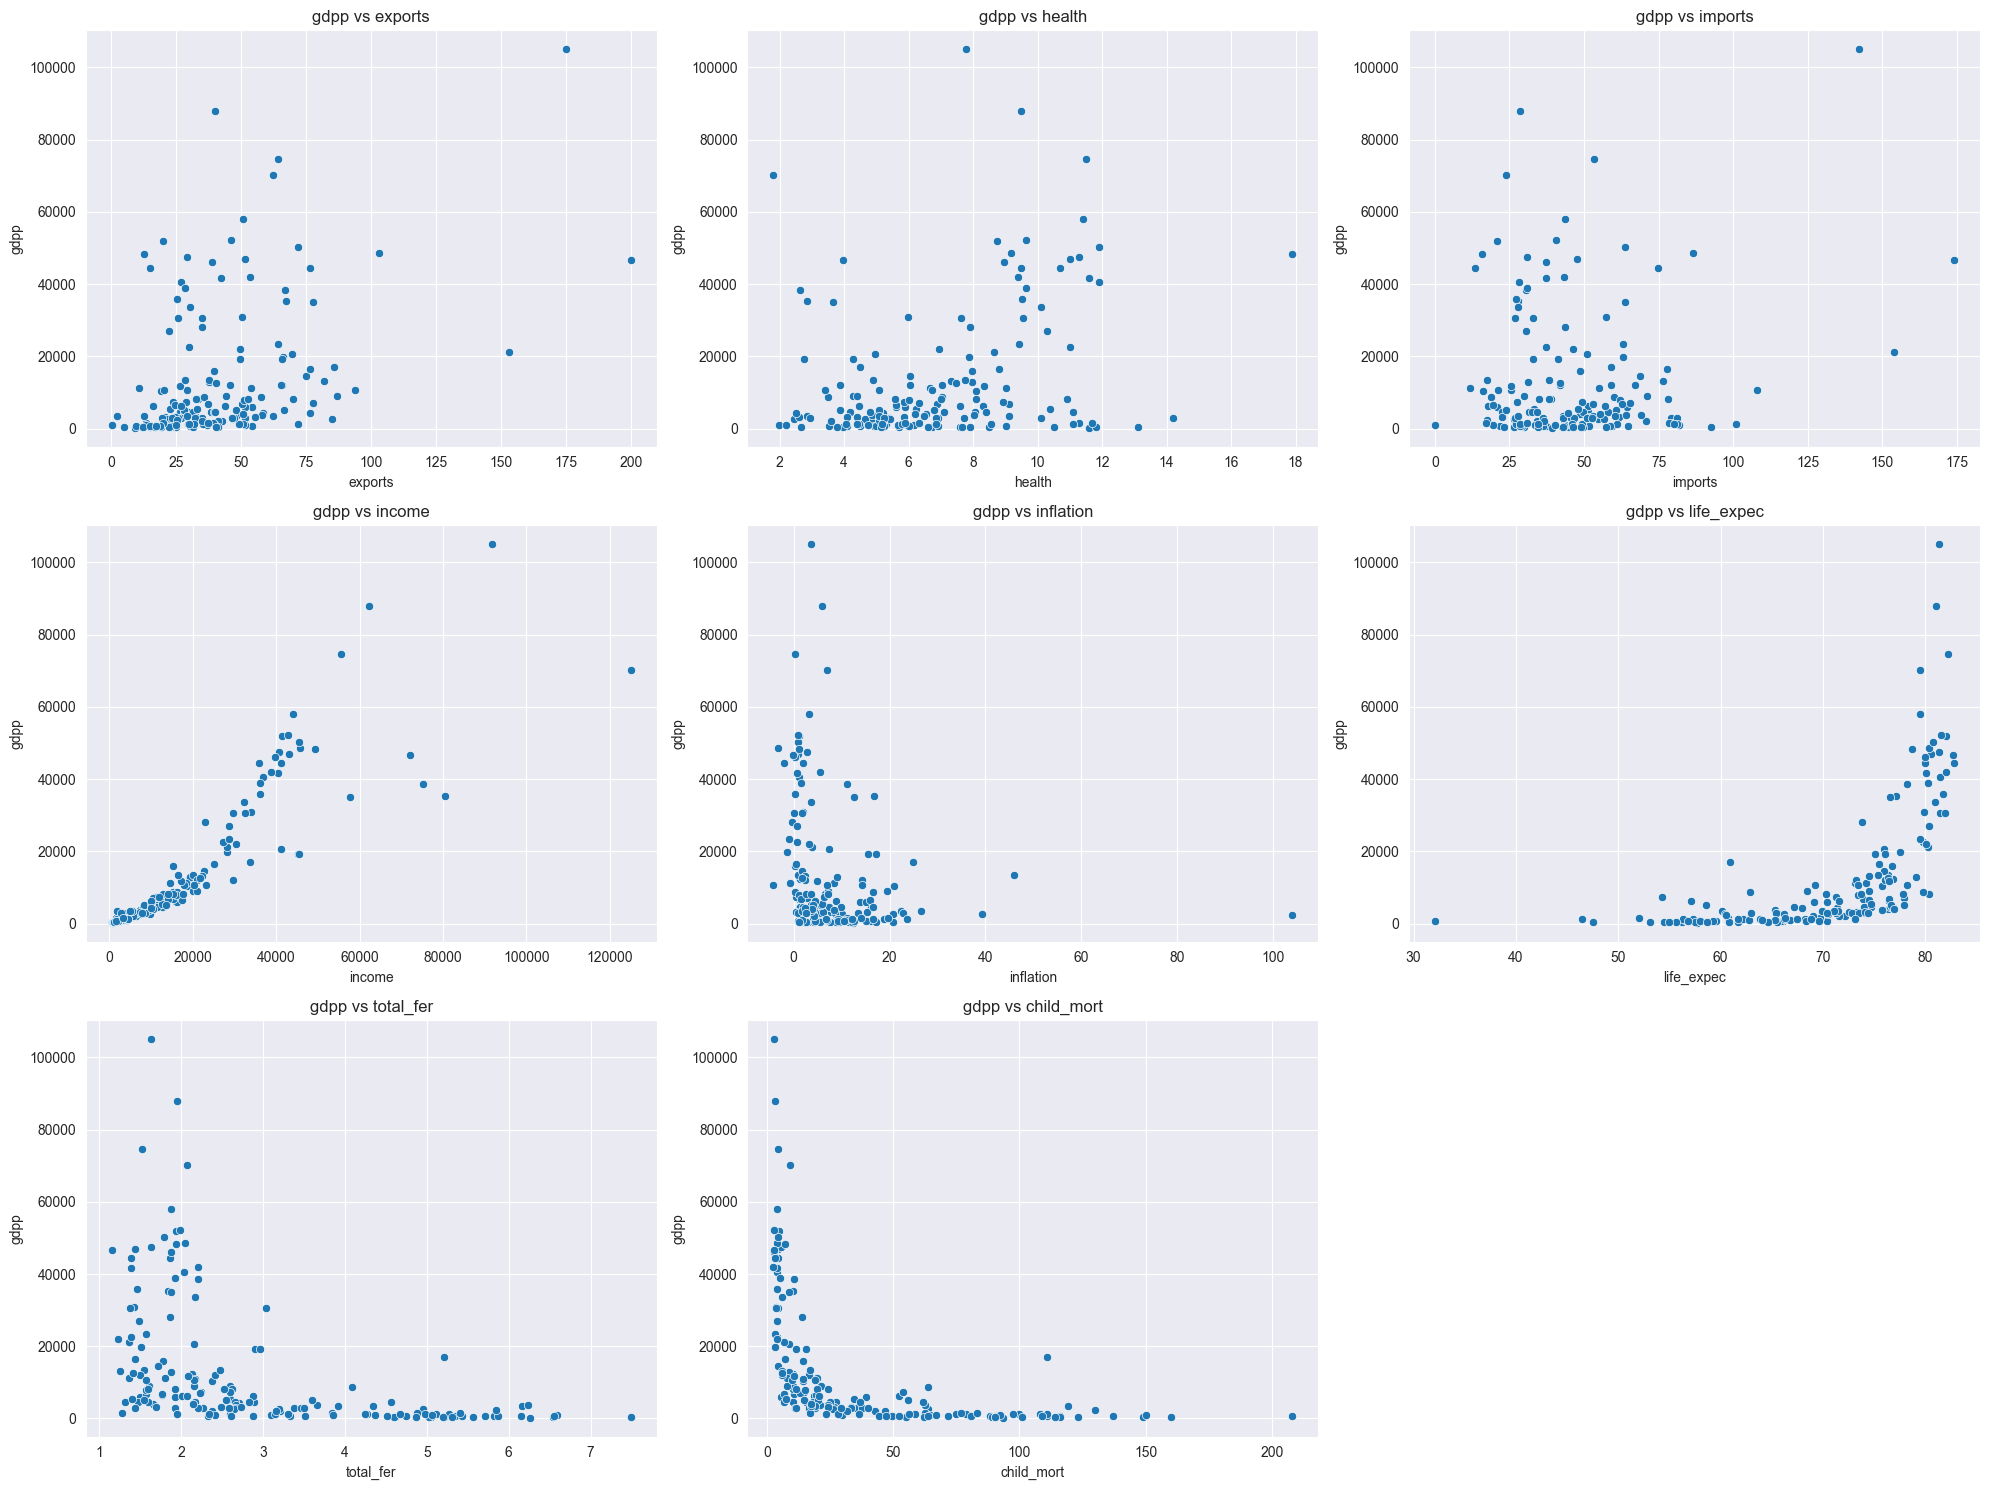

In [11]:
# Explore the continuous independent features against gdpp using scatter plots.
diff_features = ['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'child_mort']

# Create scatter plots
plt.figure(figsize=(20, 15))

# Loop through each feature to create the scatter plots
for i, feature in enumerate(diff_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=country_data[feature], y=country_data['gdpp'])
    plt.title(f'gdpp vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('gdpp')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

<Figure size 2000x1500 with 0 Axes>

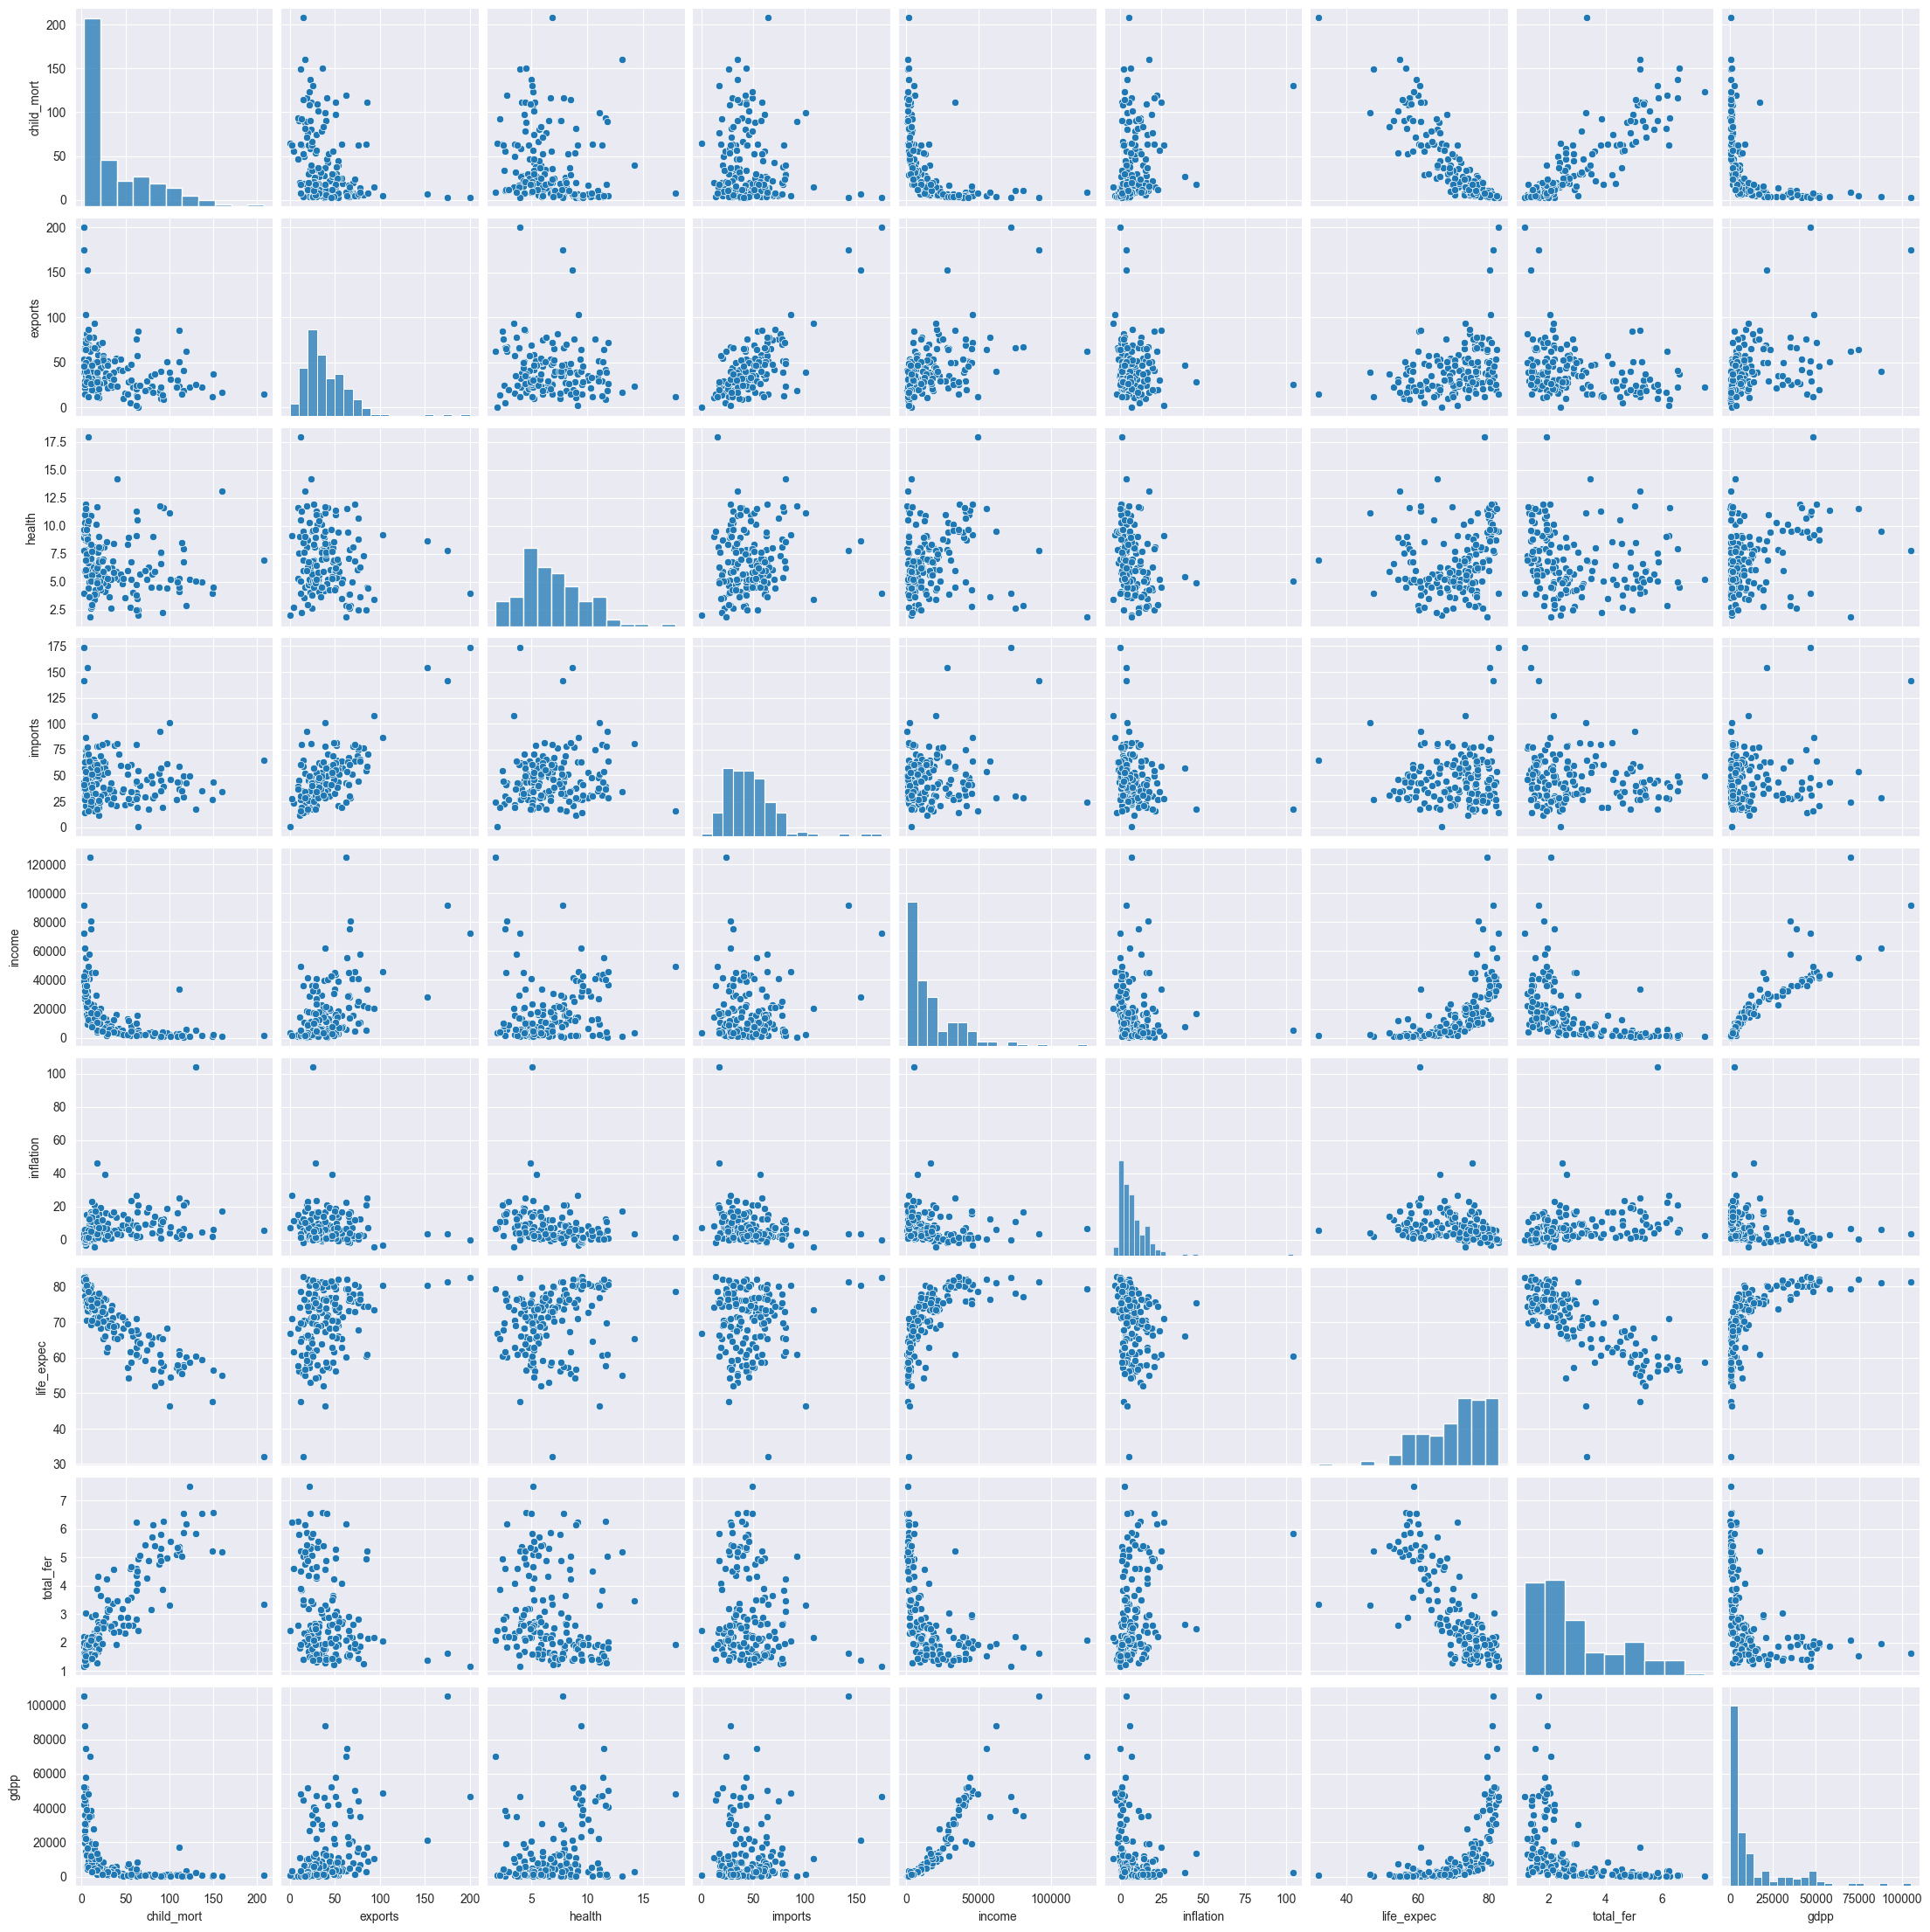

In [12]:
# Create a pair plot
# Hint: Explore seaborn pairplot
plt.figure(figsize=(20, 15))
sns.pairplot(country_data)
plt.show()

Creating a pair plot is a helpful step in exploring the relationships between features before clustering data. The diagonal plots within a pair plot show the distribution of individual features, which can give insight into how the data is spread for each feature. While distinct peaks in these plots may hint at features with distinct ranges, true separability is better assessed by examining the off-diagonal plots, which show the relationships between pairs of features. These relationships provide a clearer view of how well the data might separate into clusters.

### Scaling the Data

In [13]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe "df_scaled"
x_min_max = MinMaxScaler()

df_scaled = pd.DataFrame(x_min_max.fit_transform(country_data), columns=country_data.columns)
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


## K-Means Clustering

### Selecting K

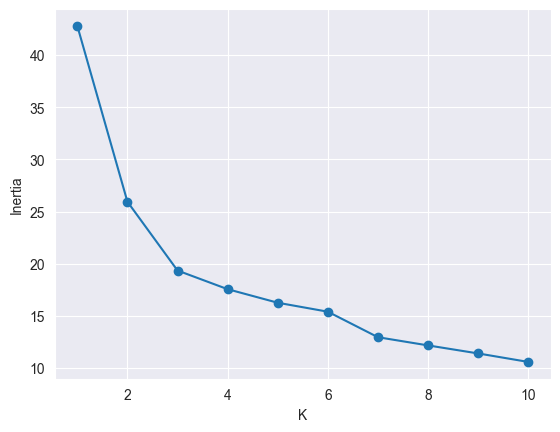

In [14]:
def eval_Kmeans(x, k, r):
    """
    Evaluates the KMeans clustering for a given number of clusters (k)
    and random seed (r), returning the inertia (sum of squared distances
    of samples to their closest cluster center).

    Parameters:
    - x: Data to be clustered.
    - k: Number of clusters.
    - r: Random state for reproducibility.

    Returns:
    - inertia: Sum of squared distances within clusters.
    """
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    """
    Plots the inertia (within-cluster variance) against the number of
    clusters to help determine the optimal number of clusters (the 'elbow' point).

    Parameters:
    - x: Data to be clustered.
    - max_k: Maximum number of clusters to evaluate (default is 10).
    - r: Random state for reproducibility (default is 123).
    """
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

elbow_Kmeans(df_scaled)

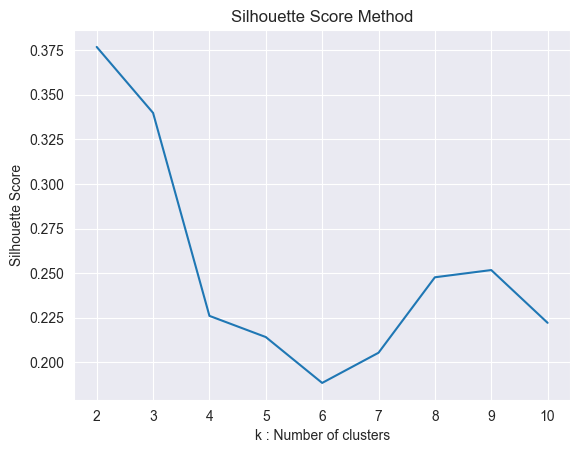

In [15]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil)
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method choose a value for K.
- Based on the elbow method the optimal value of K seems to be between 3 to 5.
- The silhouette score method however highlights a steep decline after k=3. 
- This means the optimal value we should choose would be [K=3]

## Fitting a K-Means Model with the selected K value

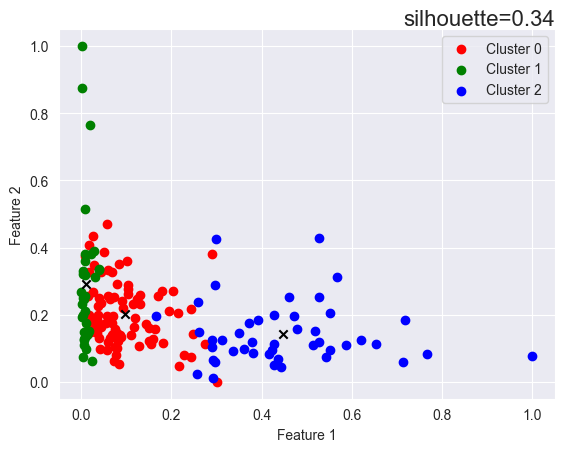

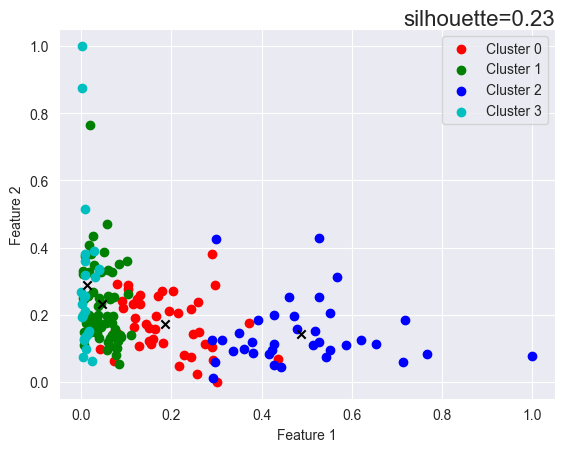

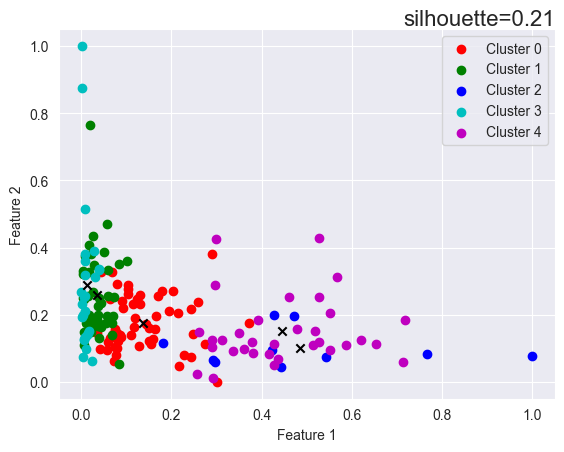

In [16]:
# Fitting K-means model
# Remember to set the random_state to rseed
def scatter_Kmeans(x, k, r=123):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=rseed)
    y_pred = kmeans.fit_predict(x)
    colours = 'rgbcmy'

    for c in range(k):
        plt.scatter(x.values[y_pred == c, 0], x.values[y_pred == c, 1], c=colours[c], label='Cluster {}'.format(c))
        plt.scatter(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], marker='x', c='black')

    score = round(silhouette_score(x, kmeans.labels_, metric='euclidean'), 2)
    plt.title('silhouette={}'.format(score), loc='right', fontdict={'fontsize': 16}, pad=-14)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


for k in range(3,6):
    scatter_Kmeans(df_scaled, k, rseed)

In [17]:
# Count the number of observations in each cluster
# Assign the cluster labels to the original dataframe
kmeans = KMeans(n_clusters=3, random_state=rseed)
country_data['cluster'] = kmeans.fit_predict(df_scaled)

country_data['cluster'].value_counts()

cluster
0    87
2    45
1    35
Name: count, dtype: int64

In [18]:
# Check model performance with the silhouette coefficient
score = silhouette_score(df_scaled, country_data['cluster'])
rounded_score = round(score, 2)
print(rounded_score)

0.34


## Predictions

In [19]:
# Add the predicted cluster label column to the original dataframe
country_data['cluster'] = kmeans.labels_
country_data.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


## Visualisation of clusters

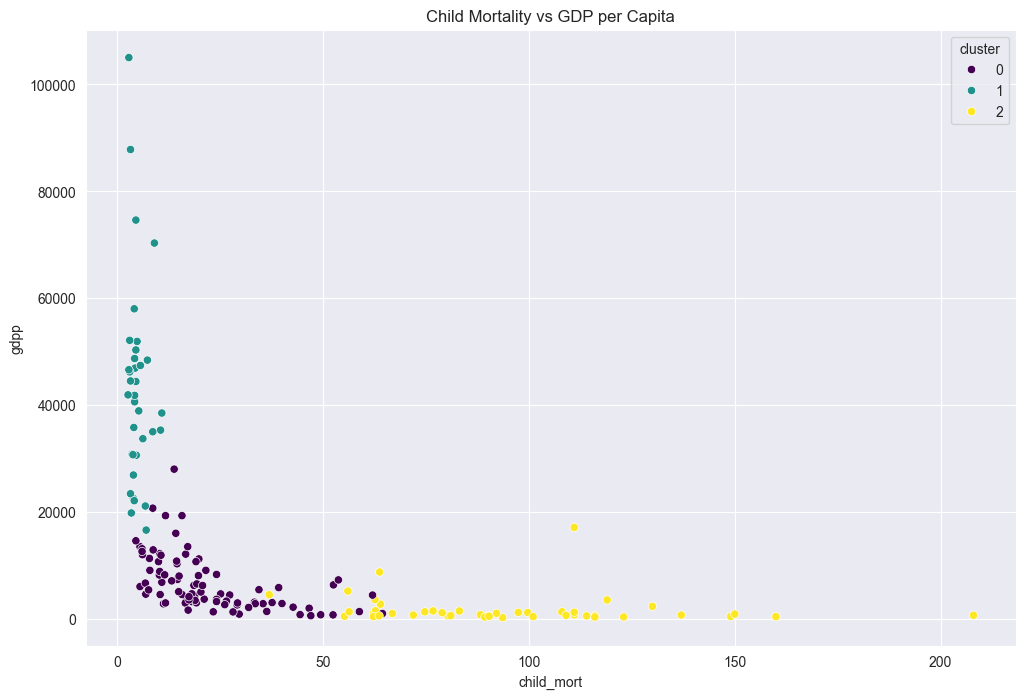

In [20]:
# Visualisation of clusters: child mortality vs gdpp
plt.figure(figsize=(12, 8))
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster', data=country_data, palette='viridis')
plt.title('Child Mortality vs GDP per Capita')
plt.show()

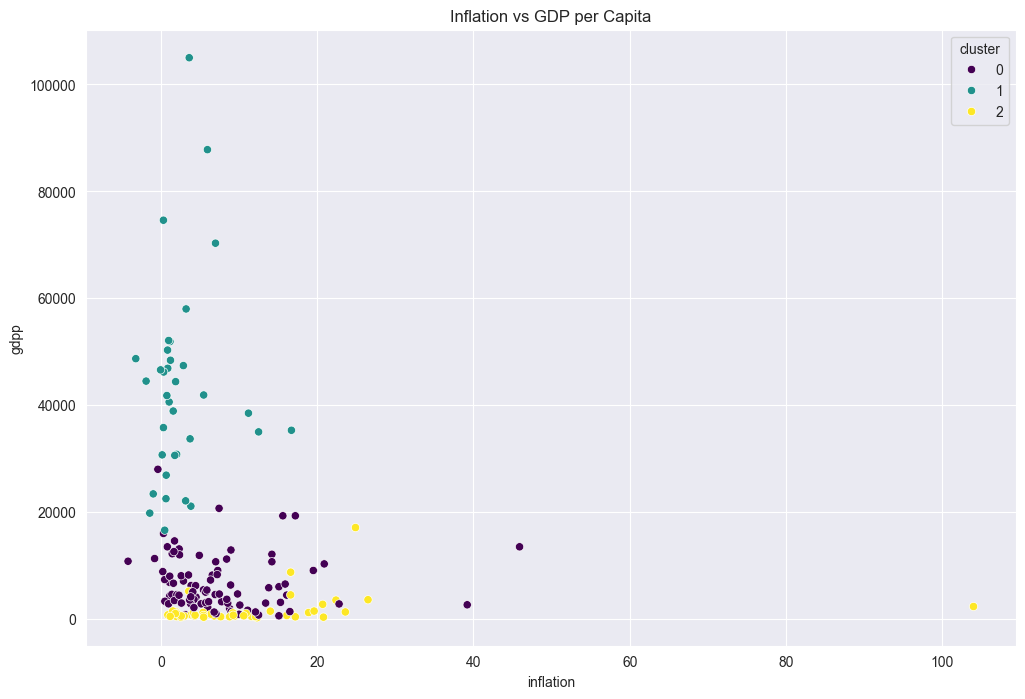

In [21]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(12, 8))
sns.scatterplot(x='inflation', y='gdpp', hue='cluster', data=country_data, palette='viridis')
plt.title('Inflation vs GDP per Capita')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


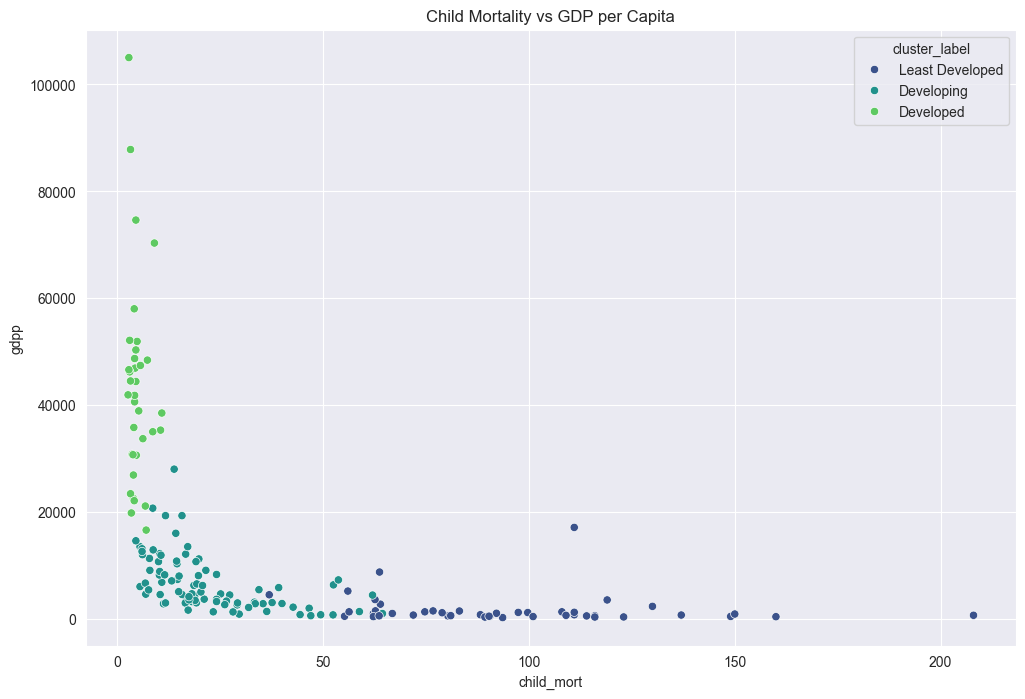

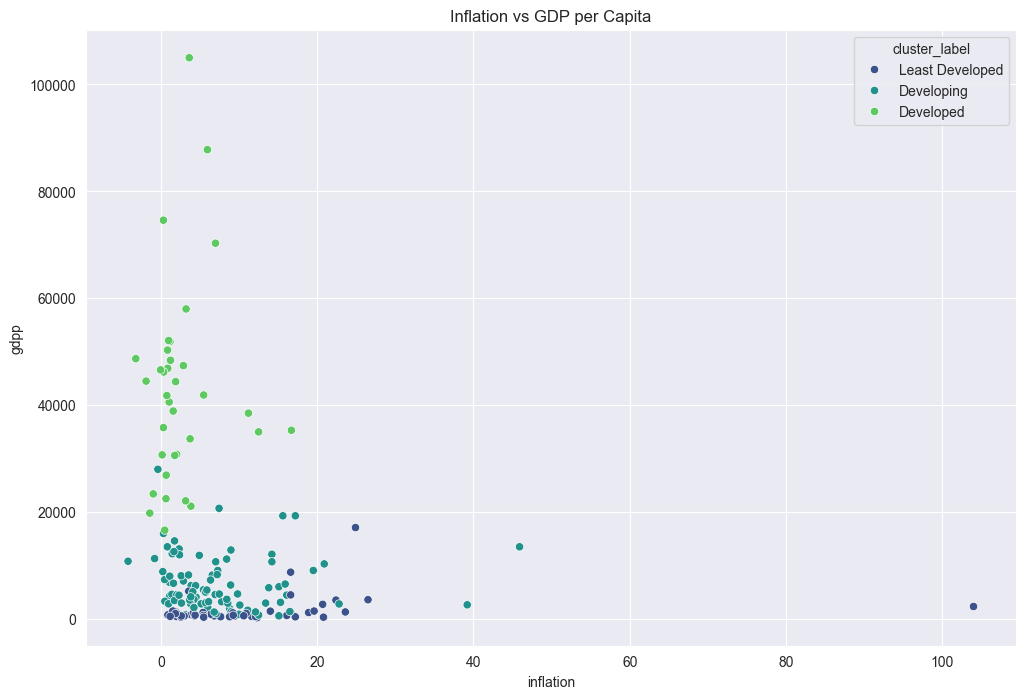

In [ ]:
# Define the labels for each cluster based on the analysis
cluster_labels = {
    0: 'Developing',
    1: 'Developed',
    2: 'Least Developed'
}

# Map the cluster labels to the cluster numbers
country_data['cluster_label'] = country_data['cluster'].map(cluster_labels)

# Display the first few rows to verify the labels
country_data.head(10)

# Visualisation of clusters with labels: child mortality vs gdpp
plt.figure(figsize=(12, 8))
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_label', data=country_data, palette='viridis')
plt.title('Child Mortality vs GDP per Capita')
plt.show()

# Visualisation of clusters with labels: inflation vs gdpp
plt.figure(figsize=(12, 8))
sns.scatterplot(x='inflation', y='gdpp', hue='cluster_label', data=country_data, palette='viridis')
plt.title('Inflation vs GDP per Capita')
plt.show()

**Answer here:**
- Developed Countries: Characterized by high GDP per capita and low child mortality and inflation rates. These countries are shown to have low child mortality rates and high gdpp values.

- Developing Countries: Characterized by moderate GDP per capita, child mortality, and inflation rates. These countries have moderate child mortality rates and moderate gdpp values.

- Least Developed Countries: Characterized by low GDP per capita and high child mortality and inflation rates. These countries are expected to have high child mortality rates and low gdpp values